In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import math


In [168]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500


In [169]:
X['Population'] /= 100
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0000,6.9841,1.0238,3.2200,2.5556,37.8800,-122.2300
1,8.3014,21.0000,6.2381,0.9719,24.0100,2.1098,37.8600,-122.2200
2,7.2574,52.0000,8.2881,1.0734,4.9600,2.8023,37.8500,-122.2400
3,5.6431,52.0000,5.8174,1.0731,5.5800,2.5479,37.8500,-122.2500
4,3.8462,52.0000,6.2819,1.0811,5.6500,2.1815,37.8500,-122.2500
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0000,5.0455,1.1333,8.4500,2.5606,39.4800,-121.0900
20636,2.5568,18.0000,6.1140,1.3158,3.5600,3.1228,39.4900,-121.2100
20637,1.7000,17.0000,5.2055,1.1201,10.0700,2.3256,39.4300,-121.2200
20638,1.8672,18.0000,5.3295,1.1719,7.4100,2.1232,39.4300,-121.3200


In [170]:
concat_california_ar = np.concatenate((X, np.reshape(y, (y.shape[0],1))), axis = 1)

california_df = pd.DataFrame(concat_california_ar, columns = data.feature_names + ['price'])

california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0000,6.9841,1.0238,3.2200,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,24.0100,2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,4.9600,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,5.5800,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,5.6500,2.1815,37.8500,-122.2500,3.4220


In [171]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,14.2548,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,11.3246,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,0.0300,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,7.8700,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,11.6600,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,17.2500,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,356.8200,1243.3333,41.9500,-114.3100,5.0000


In [172]:
# пропусков нет
california_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
Обучите модель регрессии на обучающем множестве.
Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [174]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [175]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')


# качество точности модели чуть выше среднего

Train R2 0.61
Test R2 0.60


Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [176]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


tree_1 = DecisionTreeRegressor(random_state=1, max_depth=3)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [177]:
pred_train = tree_1.predict(X_train)
pred_test = tree_1.predict(X_test)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')


# видим значительный прирост точности предсказания, что говорит об эффективности DecisionTreeRegressor.
# при max_depth=10 наблюдаем самый высокий результат на Test
# при max_depth=20 наблюдаем 100% результат на Train

Train R2 0.53
Test R2 0.54


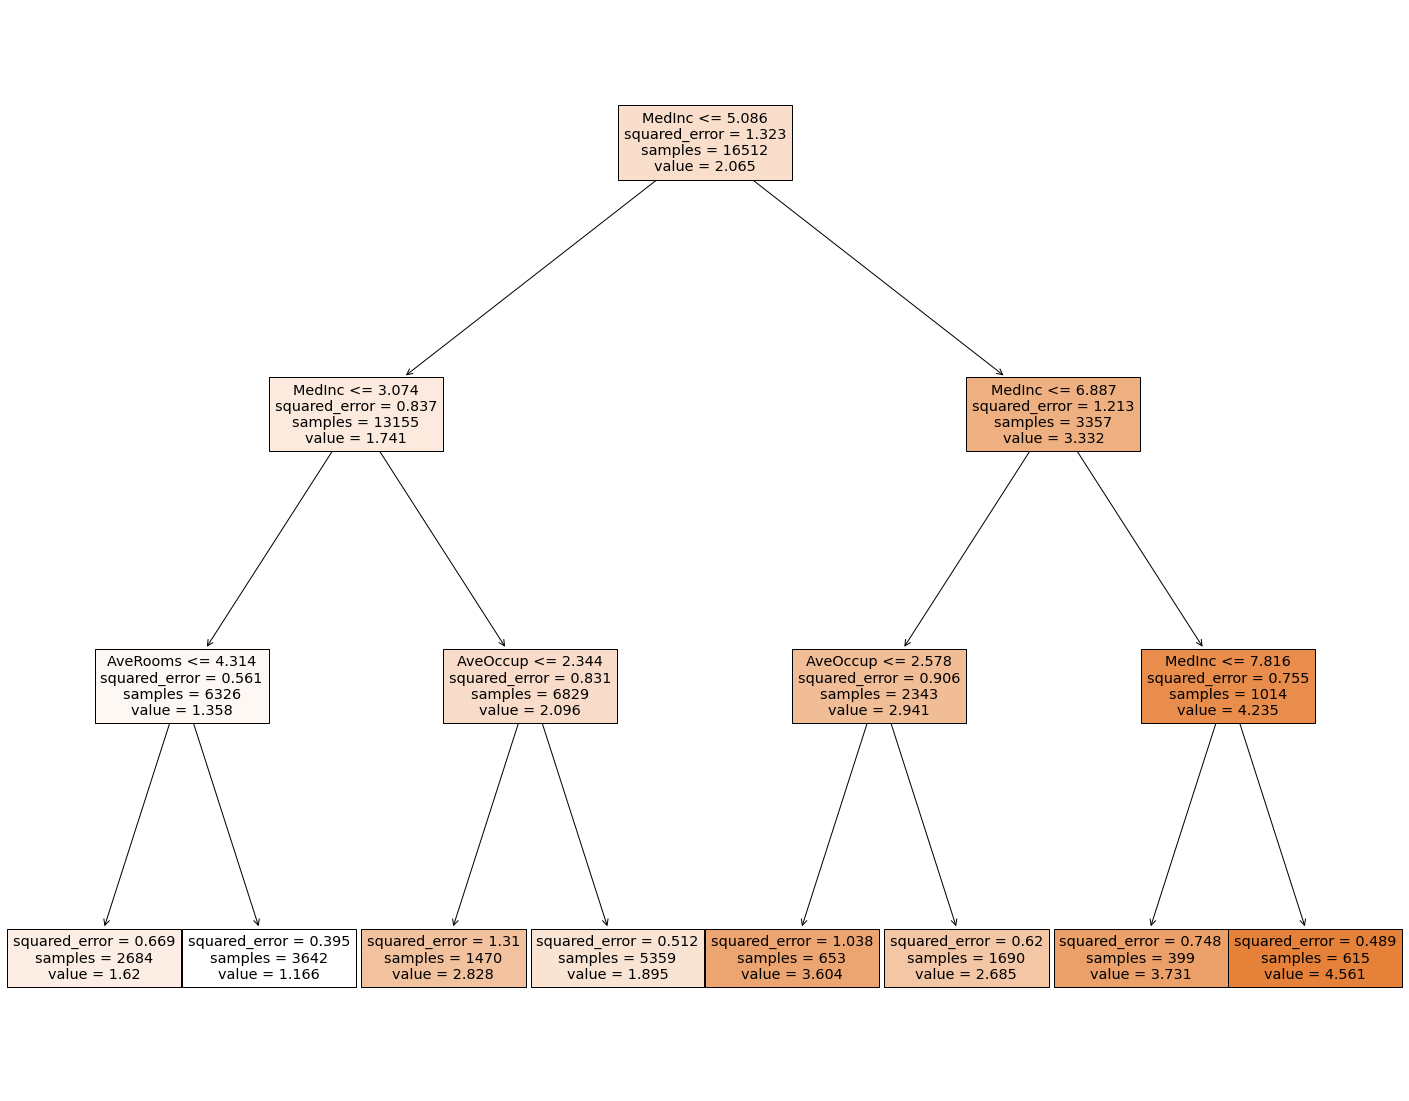

In [178]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_1, feature_names=data.feature_names, filled=True)
# при max_depth=10 вид не читабельный
